In [33]:
import numpy as np

NUM_ACTIONS = 3
ROUNDS = 100

def sample(dist):

    wheel = np.cumsum(dist)

    return np.argwhere(np.random.random() < wheel)[0][0]


In [34]:
class User:

    def __init__(self, num_actions = NUM_ACTIONS, probs = [0.5, 0.3, 0.2], rounds = ROUNDS):
        self.num_actions = num_actions
        self.rounds = rounds
        self.probs = probs

        self.rewards = []

        for r in range(0,self.rounds,15):
            choice = sample(probs)
            reward_vec = [1 if i == choice else 0 for i in range(self.num_actions)]
            self.rewards += 15 * [reward_vec]
        else:
            reward_vec = [1 if i == choice else 0 for i in range(self.num_actions)]
            self.rewards += [(self.rounds - (r-15)) * reward_vec]

    def get_reward(self, round, choice):
        return self.rewards[round][choice]



In [35]:
ad = User()

### Multiplicative reward updates

In [36]:
seq_of_rewards_for_action1 = [2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
seq_of_rewards_for_action2 = [2.1, 2.0, 1.9, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2]

sum(seq_of_rewards_for_action1), sum(seq_of_rewards_for_action2)

(23.1, 14.700000000000001)

In [37]:
np.cumprod(seq_of_rewards_for_action1)[-1], np.cumprod(seq_of_rewards_for_action2)[-1]

(4542.806268000001, 71.1075456)

In [38]:
class Learner:
    def __init__(self, adversary, num_actions=NUM_ACTIONS, rounds=ROUNDS):
        self.num_actions = NUM_ACTIONS
        self.rounds = ROUNDS

        self.adversary = adversary

        self.S_ti = np.zeros(self.num_actions)

        self.HISTORY = {"corrects" : [0]}

    def learn(self, e=0.2):

        correct = 0

        for r in range(self.rounds):

            P_ti = np.exp(e * self.S_ti) / np.sum(np.exp(e * self.S_ti))

            print(P_ti)
            choice = sample(P_ti)



            reward = self.adversary.get_reward(r, choice)

            if reward == 1:
                correct += 1 

            self.HISTORY["corrects"] += [correct]

            self.S_ti[choice] += reward / P_ti[choice]


In [39]:
agent = Learner(ad)
agent.learn()

[0.33333333 0.33333333 0.33333333]
[0.47673003 0.26163499 0.26163499]
[0.47673003 0.26163499 0.26163499]
[0.47673003 0.26163499 0.26163499]
[0.5808777  0.20956115 0.20956115]
[0.5808777  0.20956115 0.20956115]
[0.5808777  0.20956115 0.20956115]
[0.5808777  0.20956115 0.20956115]
[0.66165631 0.16917185 0.16917185]
[0.66165631 0.16917185 0.16917185]
[0.72570825 0.13714587 0.13714587]
[0.72570825 0.13714587 0.13714587]
[0.77704852 0.11147574 0.11147574]
[0.81845766 0.09077117 0.09077117]
[0.85198999 0.07400501 0.07400501]
[0.85198999 0.07400501 0.07400501]
[0.87921734 0.06039133 0.06039133]
[0.9013677  0.04931615 0.04931615]
[0.9194131  0.04029345 0.04029345]
[0.93412982 0.03293509 0.03293509]
[0.93412982 0.03293509 0.03293509]
[0.94614153 0.02692923 0.02692923]
[0.95595156 0.02202422 0.02202422]
[0.96396739 0.01801631 0.01801631]
[0.97051968 0.01474016 0.01474016]
[0.97587731 0.01206134 0.01206134]
[0.98025917 0.00987042 0.00987042]
[0.98384368 0.00807816 0.00807816]
[0.98677639 0.006611

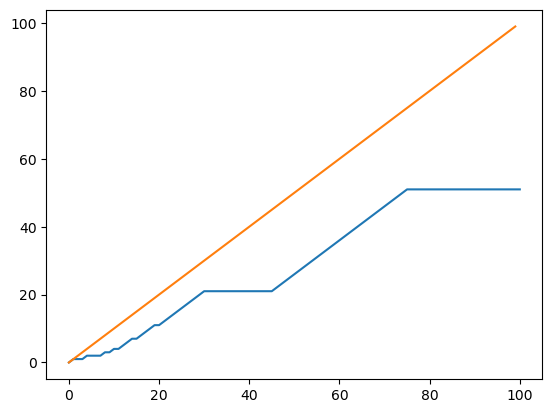

In [40]:
import matplotlib.pyplot as plt


plt.plot(agent.HISTORY["corrects"])
plt.plot(range(100))